# Problema 1

In [24]:
import cv2
import numpy as np

def activar_canales_color(imagen, color):
    # Convertir la imagen a BGR si no lo está
    if len(imagen.shape) == 2 or imagen.shape[2] == 1:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

    # Crear una máscara para los canales
    b, g, r = cv2.split(imagen)
    cero = np.zeros_like(b)

    if color == 1:
        return cv2.merge([b, cero, cero])
    elif color == 2:
        return cv2.merge([cero, g, cero])
    elif color == 3:
        return cv2.merge([cero, cero, r])
    elif color == 10:
        return cv2.merge([cero, g, r])
    elif color == 20:
        return cv2.merge([b, g, cero])
    elif color == 30:
        return cv2.merge([b, cero, r])
    else:
        raise ValueError("Color no válido")

imagen = cv2.imread('/content/problema 1.jpg')
imagen_modificada = activar_canales_color(imagen, 1)
cv2.imwrite('imagen_modificada_problema1.jpg', imagen_modificada)


True

Problema 2

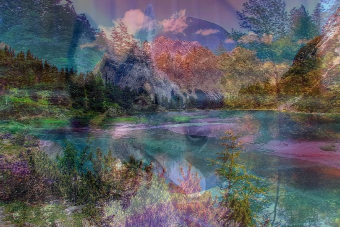

In [25]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def read_and_verify_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error al leer la imagen {path}")
    return img

def ensure_same_size(images):
    min_shape = min((img.shape for img in images), key=lambda x: x[0]*x[1])
    resized_images = [cv2.resize(img, (min_shape[1], min_shape[0])) for img in images]
    return resized_images

def reconstruir_imagen_a_color(img_b_paths, img_g_paths, img_r_paths):
    # Leer y verificar imágenes
    imgs_b = [read_and_verify_image(path) for path in img_b_paths]
    imgs_g = [read_and_verify_image(path) for path in img_g_paths]
    imgs_r = [read_and_verify_image(path) for path in img_r_paths]

    # Dejamos el mismo tamaño a la imagen
    imgs_b = ensure_same_size(imgs_b)
    imgs_g = ensure_same_size(imgs_g)
    imgs_r = ensure_same_size(imgs_r)

    # Calcular los canales B, G y R
    b = np.mean(imgs_b, axis=0).astype(np.uint8)
    g = np.mean(imgs_g, axis=0).astype(np.uint8)
    r = np.mean(imgs_r, axis=0).astype(np.uint8)

    # Combinar los colores
    color_image = cv2.merge([b, g, r])
    return color_image

# Paths de las imágenes en escala de grises
img_b_paths = ['/content/imagen1_salida_gray_azul.jpg',
               '/content/imagen2_salida_gray_azul.jpg',
               '/content/perro_salida_gray_azul.jpg']

img_g_paths = ['/content/imagen1_salida_gray_verde.jpg',
               '/content/perro_salida_gray_verde.jpg',
               '/content/imagen2_salida_gray_verde.jpg']

img_r_paths = ['/content/imagen1_salida_gray_rojo.jpg',
               '/content/imagen2_salida_gray_rojo.jpg',
               '/content/perro_salida_gray_rojo.jpg']

# Reconstruir la imagen a color
imagen_color = reconstruir_imagen_a_color(img_b_paths, img_g_paths, img_r_paths)

# Guardar la imagen reconstruida (opcional)
cv2.imwrite('imagen_color_problema2.jpg', imagen_color)

# Mostrar la imagen reconstruida
cv2_imshow(imagen_color)



# Problema 3

In [19]:
def crear_escala_grises_3d(imagen):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    # Crear tres imágenes en escala de grises
    return [gris, gris, gris]

# Ejemplo de uso
imagen = cv2.imread('/content/problema2.jpg')
imagenes_grises_3d = crear_escala_grises_3d(imagen)
for i, img in enumerate(imagenes_grises_3d):
    cv2.imwrite(f'problema3_{i}.jpg', img)


# Problema 4

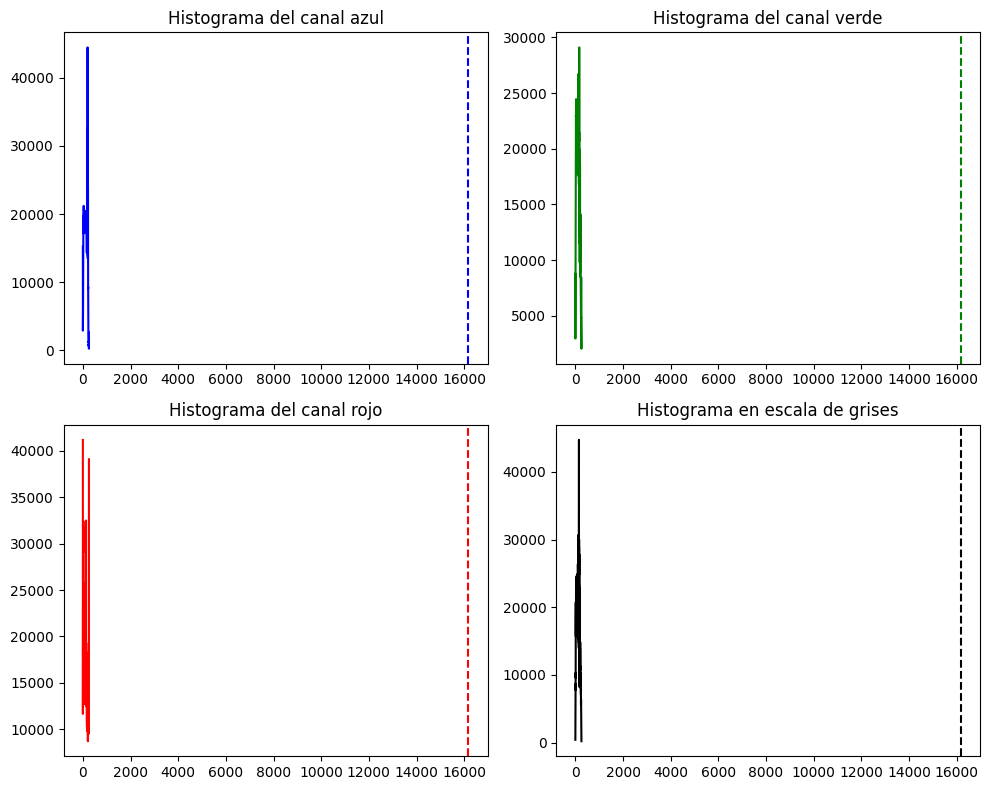

In [17]:
import matplotlib.pyplot as plt

def mostrar_histograma(imagen):
    # Separar canales
    b, g, r = cv2.split(imagen)

    # Calcular el histograma de cada canal
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    hist_gris = cv2.calcHist([gris], [0], None, [256], [0, 256])

    # Mostrar histogramas
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.plot(hist_b, color='blue')
    plt.axvline(x=np.mean(hist_b), color='blue', linestyle='dashed')
    plt.title('Histograma del canal azul')

    plt.subplot(2, 2, 2)
    plt.plot(hist_g, color='green')
    plt.axvline(x=np.mean(hist_g), color='green', linestyle='dashed')
    plt.title('Histograma del canal verde')

    plt.subplot(2, 2, 3)
    plt.plot(hist_r, color='red')
    plt.axvline(x=np.mean(hist_r), color='red', linestyle='dashed')
    plt.title('Histograma del canal rojo')

    plt.subplot(2, 2, 4)
    plt.plot(hist_gris, color='black')
    plt.axvline(x=np.mean(hist_gris), color='black', linestyle='dashed')
    plt.title('Histograma en escala de grises')

    plt.tight_layout()
    plt.show()

# Cargar la imagen
imagen = cv2.imread('/content/problema2.jpg')
mostrar_histograma(imagen)


# Problema 5

In [21]:
def escala_grises_ponderada(imagen):
    # Usar la fórmula ponderada
    gris_ponderado = 0.299 * imagen[:,:,2] + 0.587 * imagen[:,:,1] + 0.114 * imagen[:,:,0]
    return gris_ponderado.astype(np.uint8)

# Ejemplo de uso
imagen = cv2.imread('/content/problema2.jpg')
imagen_gris_ponderada = escala_grises_ponderada(imagen)
cv2.imwrite('resultado_problema5.jpg', imagen_gris_ponderada)


True

# Problema 6: Espacio de color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que representa los colores en términos de su matiz (H), saturación (S) y valor (V). Este modelo se utiliza comúnmente en aplicaciones de procesamiento de imágenes porque se asemeja más a cómo los humanos perciben los colores.

- **Hue (H):** Representa el tipo de color y se mide en grados de 0 a 360. Por ejemplo, 0 grados corresponde al rojo, 120 grados al verde y 240 grados al azul.
- **Saturation (S):** Indica la pureza del color, donde 0 es un color gris y 100% es el color más puro.
- **Value (V):** Representa la luminosidad del color, donde 0 es completamente oscuro y 100% es el color más brillante.

En OpenCV, podemos convertir una imagen del espacio de color BGR al espacio de color HSV utilizando la función `cv2.cvtColor`.


In [22]:
import cv2
# Convertir una imagen de BGR a HSV
imagen = cv2.imread('/content/problema2.jpg')
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
cv2.imwrite('problema6_hsv.jpg', imagen_hsv)


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')